In [1]:
import json
import pennylane as qml
import pennylane.numpy as np


# Tutorial 1
info on json serialization: https://stackoverflow.com/questions/3316762/what-is-deserialize-and-serialize-in-json

In [5]:
# Welcome to the QHack 2023 coding challenges!
def add_numbers(x, y):
    """This function adds two numbers together.

    Args:
        x (float): A number.
        y (float): A number.

    Returns:
        (float): The result of adding x and y.
    """


    # Put your code here # 
    return x+y


# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    x, y = json.loads(test_case_input)
    result = add_numbers(x, y)
    return str(result)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your addition function isn't quite right!"


test_cases = [['[0.2, -0.2]', '0.0']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.2, -0.2]'...
Correct!


In [10]:
(test_cases[0][0])

'[0.2, -0.2]'

In [13]:
a,b = json.loads(test_cases[0][0])
b

-0.2

# Tutorial 2

In [14]:
import json
import pennylane as qml
import pennylane.numpy as np

# Put your code here #

# Create a default.qubit device with 2 qubits / wires using qml.device
dev1 = qml.device("default.qubit", wires=2)
# Turn your circuit into a QNode

@qml.qnode(dev1)
def circuit(angles):
    """The quantum circuit that you will simulate.
    Args:
        angles (list(float)): The gate angles in the circuit.

    Returns:
        (numpy.tensor): 
            The probability vector of the underlying quantum state that this circuit produces.
    """
    # Put the rotation gates here
    qml.RY(angles[0],wires=0)
    qml.RY(angles[1], wires=1)
    return qml.probs(wires=[0, 1])


# These functions are responsible for testing the solution. 
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(angles).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)
    


test_cases = [['[1.23, 4.56]', '[0.2829251572359589, 0.3841937063262924, 0.1411749135148633, 0.19170622292288542]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1.23, 4.56]'...
Correct!


# Tutorial 3

In [64]:
import json
import pennylane as qml
import pennylane.numpy as np

n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)
error_dict = {0: 'PauliX', 1: 'PauliY', 2: 'PauliZ'}

def error(error_key, qubit):
    """Defines the error that is induced in the circuit.

    Args:
        error_key (int): An integer associated to the type of error (Pauli X, Y, or Z)
        qubit (int): The qubit that the error occurs on.
    """
    getattr(qml, error_dict[error_key])(qubit)

@qml.qnode(dev)
def shor(state, error_key, qubit):
    """A circuit defining Shor's code for error correction.

    Args:
        state (list(float)): The quantum state of the first qubit in the circuit.
        error_key (int): An integer associated to the type of error (Pauli X, Y, or Z)
        qubit (int): The qubit that the error occurs on.

    Returns:
        (list(float)): The expectation value of the Pauli Z operator on every qubit.
    """
    qml.QubitStateVector(np.array(state), wires=0)

    qml.CNOT([0,3])
    qml.CNOT([0,6])
    for i in range(n_qubits)[::3]:
        qml.Hadamard(i)
        qml.CNOT([i,i+1])
        qml.CNOT([i,i+2])
    error(error_key, qubit)
    for i in range(n_qubits)[::3]:
        qml.CNOT([i,i+1])
        qml.CNOT([i,i+2])
        qml.Toffoli([i+2, i+1, i])
        qml.Hadamard(i)
        if i!=0:
            qml.CNOT([0,i])
    qml.Toffoli([6,3,0])
    # Put your code here #
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    state, error_key, qubit = json.loads(test_case_input)
    output = shor(state, error_key, qubit).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-4)


test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[0, 1], 0, 3]'...
Correct!


In [19]:
def draw_circuit_nice(function, test_cases):
    import matplotlib.pyplot as plt
    #test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]']]
    #state, error_key, qubit = json.loads(test_cases[0][0])
    qml.drawer.use_style("black_white")
    fig, ax = qml.draw_mpl(function)(*json.loads(test_cases[0][0]))
    plt.show()

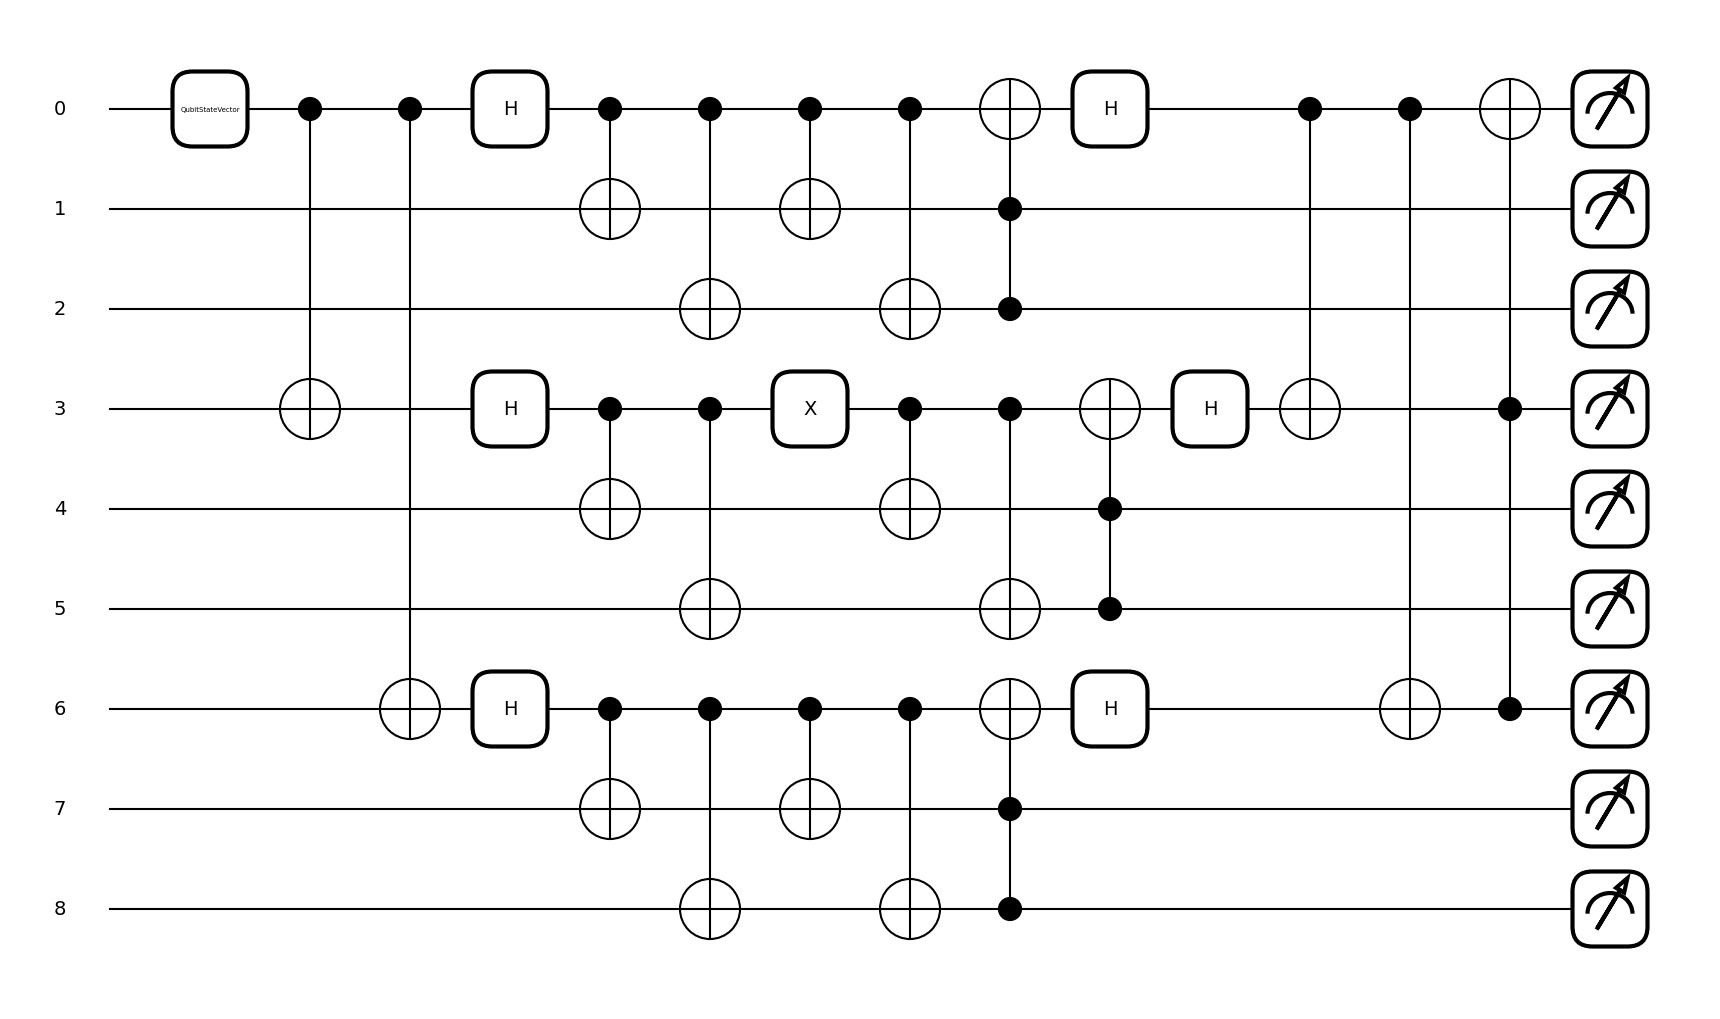

In [80]:
draw_circuit_nice(shor, test_cases)

# Tutorial 4

In [2]:
import json
import pennylane as qml
import pennylane.numpy as np

def is_product(state, subsystem, wires):
    """Determines if a pure quantum state can be written as a product state between 
    a subsystem of wires and their compliment.

    Args:
        state (numpy.array): The quantum state of interest.
        subsystem (list(int)): The subsystem used to determine if the state is a product state.
        wires (list(int)): The wire/qubit labels for the state. Use these for creating a QNode if you wish!

    Returns:
        (str): "yes" if the state is a product state or "no" if it isn't.
    """

    # Put your solution here #
    n_qubits = int(np.log2(len(state)))
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def circuit():
        qml.QubitStateVector(state, wires=wires)
        return qml.density_matrix(subsystem)

    #print(circuit())
    diag = abs(np.linalg.eigvals(circuit()))
    num_eigenvals = 0
    for d in diag:
        if abs(d) >= 1e-4:
            num_eigenvals +=1
    #num_eigenvals = np.count_nonzero(diag)
    if (num_eigenvals)==1:
        return 'yes'
    else:
        return 'no'


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    state, subsystem, wires = ins
    state = np.array(state)
    output = is_product(state, subsystem, wires)
    return output

def check(solution_output: str, expected_output: str) -> None:
    assert solution_output == expected_output


test_cases = [['[[0.707107, 0, 0, 0.707107], [0], [0, 1]]', 'no'], ['[[1, 0, 0, 0], [0], [0, 1]]', 'yes']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[0.707107, 0, 0, 0.707107], [0], [0, 1]]'...
Correct!
Running test case 1 with input '[[1, 0, 0, 0], [0], [0, 1]]'...
Correct!


# TUTORIAL 5

In [4]:
import json
import pennylane as qml
import pennylane.numpy as np

def hydrogen_hamiltonian(coordinates, charge):
    """Calculates the qubit Hamiltonian of the hydrogen molecule.
    
    Args:
        coordinates (list(float)): Cartesian coordinates of each hydrogen molecule.
        charge (int): The electric charge given to the hydrogen molecule.

    Returns:
        (qml.Hamiltonian): A PennyLane Hamiltonian.
    """
    return qml.qchem.molecular_hamiltonian(
        ["H", "H"], coordinates, charge, basis="STO-3G"
    )[0]

def num_electrons(charge):
    """The total number of electrons in the hydrogen molecule.
    
    Args:
        charge (int): The electric charge given to the hydrogen molecule.

    Returns: 
        (int): The number of electrons.
    """


    # Put your solution here #
    return 2-charge


def hf(electrons, num_qubits):
    """Calculates the Hartree-Fock state of the hydrogen molecule.
    
    Args:
        electrons (int): The number of electrons in the hydrogen molecule.
        num_qubits (int): The number of qubits needed to represent the hydrogen molecule Hamiltonian.

    Returns:
        (numpy.tensor): The HF state.
    """
    hf = qml.qchem.hf_state(electrons=electrons, orbitals=num_qubits)

    # Put your solution here #
    return hf


def run_VQE(coordinates, charge):
    """Performs a VQE routine for the given hydrogen molecule.

    Args:
        coordinates (list(float)): Cartesian coordinates of each hydrogen molecule.
        charge (int): The electric charge given to the hydrogen molecule.:

    Returns:
        (float): The expectation value of the hydrogen Hamiltonian.
    """

    hamiltonian = hydrogen_hamiltonian(np.array(coordinates), charge)

    electrons = num_electrons(charge)
    num_qubits = len(hamiltonian.wires)

    hf_state = hf(electrons, num_qubits)
    # singles and doubles are used to make the AllSinglesDoubles template
    singles, doubles = qml.qchem.excitations(electrons, num_qubits)

    dev = qml.device("default.qubit", wires=num_qubits)

    @qml.qnode(dev)
    def cost(weights):
        """A circuit with tunable parameters/weights that measures the expectation value of the hydrogen Hamiltonian.
        
        Args:
            weights (numpy.array): An array of tunable parameters.

        Returns:
            (float): The expectation value of the hydrogen Hamiltonian.
        """

        qml.templates.AllSinglesDoubles(weights, range(num_qubits), hf_state, singles, doubles)
        # Put your solution here #
        return qml.expval(hamiltonian)


    np.random.seed = 1234
    weights = np.random.normal(
        0, np.pi, len(singles) + len(doubles), requires_grad=True
    )
    opt = qml.AdamOptimizer(0.5)

    for _ in range(200):
        weights = opt.step(cost, weights)

    return cost(weights)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    coordinates, charge = json.loads(test_case_input)
    energy = run_VQE(coordinates, charge)

    return str(energy)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-3)


test_cases = [['[[0.0, 0.0, -0.8, 0.0, 0.0, 0.8], -1]', '-0.53168359'], ['[[0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614], 0]', '-1.13618883']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[0.0, 0.0, -0.8, 0.0, 0.0, 0.8], -1]'...
Correct!
Running test case 1 with input '[[0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614], 0]'...
Correct!


# Tutorial 6

In [11]:
import json
import pennylane as qml
import pennylane.numpy as np

def hamiltonian(num_wires):
    """A function for creating the Hamiltonian in question for a general
    number of qubits.

    Args:
        num_wires (int): The number of qubits.

    Returns:
        (qml.Hamiltonian): A PennyLane Hamiltonian.
    """
    couplings = [-1]
    ops = [qml.PauliZ(num_wires-1)]

    for i in range(num_wires-1):
        couplings = [-1] + couplings
        ops = [qml.PauliZ(i)] + ops  

    for i in range(num_wires):
        for j in range(i,num_wires):
            if i<j:
                couplings = [1/3] + couplings
                ops = [qml.PauliX(i)@qml.PauliX(j)] + ops
    # Put your solution here #
    return qml.Hamiltonian(couplings,ops)


def expectation_value(num_wires):
    """Simulates the circuit in question and returns the expectation value of the 
    Hamiltonian in question.

    Args:
        num_wires (int): The number of qubits.

    Returns:
        (float): The expectation value of the Hamiltonian.
    """


    # Put your solution here #

    # Define a device using qml.device
    dev = qml.device("default.qubit", wires=num_wires)

    H  = hamiltonian(num_wires)

    @qml.qnode(dev)
    def circuit(num_wires):
        """A quantum circuit with Hadamard gates on every qubit and that measures
        the expectation value of the Hamiltonian in question. 
        """


        # Put Hadamard gates here #
        for i in range(num_wires):
            qml.Hadamard(wires=i)

        # Then return the expectation value of the Hamiltonian using qml.expval
        return qml.expval(H)

        
        # Put your solution here #

    return circuit(num_wires)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    num_wires = json.loads(test_case_input)
    output = expectation_value(num_wires)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)


test_cases = [['8', '9.33333']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '8'...
Correct!


# Tutorial  7

In [16]:
import json
import pennylane as qml
import pennylane.numpy as np

def three_optimization_steps(data):
    """Performs three optimization steps on a quantum machine learning model.

    Args:
        data (list(float)): Classical data that is to be embedded in a quantum circuit.

    Returns:
        (float): The cost function evaluated after three optimization steps.
    """

    normalize = np.sqrt(np.sum(data[i] ** 2 for i in range(len(data))))
    data /= normalize

    dev = qml.device("default.qubit", wires=3)

    @qml.qnode(dev)
    def cost(weights, data=data):
        """A circuit that embeds classical data and has quantum gates with tunable parameters/weights.

        Args:
            weights (numpy.array): An array of tunable parameters that help define the gates needed.

        Kwargs:
            data (list(float)): Classical data that is to be embedded in a quantum circuit.

        Returns:
            (float): The expectation value of the sum of the Pauli Z operator on every qubit.
        """

        qml.AmplitudeEmbedding(features=data, wires=range(3))
        # Put your code here #
        qml.BasicEntanglerLayers(weights=weights, wires=range(3))


        return qml.expval(qml.PauliZ(0) + qml.PauliZ(1) + qml.PauliZ(2))


    # initialize the weights
    shape = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=dev.num_wires)
    weights = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], requires_grad=True).reshape(
        shape
    )


    # Put your code here #
    step_size = 0.01
    opt = qml.GradientDescentOptimizer(stepsize=step_size)
    max_iterations = 3
    # Define a gradient descent optimizer with a step size of 0.01
    for n in range(max_iterations):
        weights, prev_energy = opt.step_and_cost(cost, weights, data=data)
    # Optimize the cost function for three steps


    return cost(weights, data=data)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    data = json.loads(test_case_input)
    cost_val = three_optimization_steps(data)
    return str(cost_val)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)


test_cases = [['[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]', '0.066040']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]'...
Correct!


# Tutorial 6

In [37]:
import json
import pennylane as qml
import pennylane.numpy as np

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def circuit(angles):
    """A quantum circuit made from the quantum function U.

    Args:
        angles (list(float)): A list of angles containing theta_0, theta_1, theta_2, and theta_3 in that order. 
    Returns:
        (numpy.tensor): The probability of the fourth qubit.
    """


    # Put your code here #
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
    qml.RX(phi=angles[0], wires=0)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[2,1])
    
    m_0 = qml.measure(0)
    m_2 = qml.measure(2)
    print(angles)
    qml.cond(m_0 + m_2 >=1, qml.U3)(angles[1], angles[2], angles[3], wires=3)

    qml.PauliZ(wires=3)
    return qml.probs(wires=3)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(angles).tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-4)


test_cases = [['[1.0, 1.5, 2.0, 2.5]', '[0.79967628, 0.20032372]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1.0, 1.5, 2.0, 2.5]'...
[1.0, 1.5, 2.0, 2.5]
Correct!


[1.0, 1.5, 2.0, 2.5]


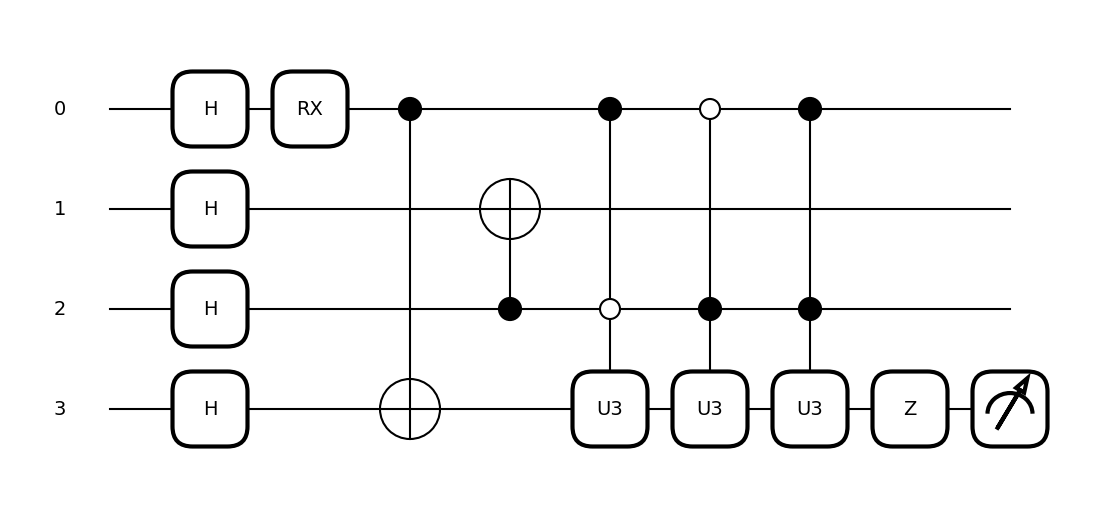

In [38]:
def draw_circuit_nice(function, param):
    import matplotlib.pyplot as plt
    #test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]']]
    #state, error_key, qubit = json.loads(test_cases[0][0])
    qml.drawer.use_style("black_white")
    fig, ax = qml.draw_mpl(function)(param)
    plt.show()
draw_circuit_nice(circuit, [1.0, 1.5, 2.0, 2.5])

# Resources:
- https://docs.pennylane.ai/en/stable/code/api/pennylane.cond.html
- https://docs.pennylane.ai/en/stable/code/api/pennylane.measure.html
- general tutorial: https://pennylane.ai/qml/demos/tutorial_qubit_rotation.html#optimization